**Importing Libraries and Defining Important Functions**

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
def modified_z_score(ys):
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]
    return modified_z_scores

Credits: Code for modified_z_score method is copied from http://colingorrie.github.io/outlier-detection.html

**Reading the csv file and displaying head**

In [3]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [4]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Checking all attribute names**

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


As all columns containg 5000 entries, we can conclude that there is no column with null values.

**Dropping ID column** (as it doesn't contibute to the data analysis and model building)

In [6]:
bank_df.drop(columns='ID',inplace=True)

## Q2. Study the data distribution in each attribute, share your findings ##

In [7]:
bank_df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Checking for missing (NaN) values

In [44]:
bank_df.isna().sum().sum()

0

Getting z-scores for each element for analytical purposes

In [8]:
bank_df_zscores = pd.DataFrame(stats.zscore(bank_df),columns=bank_df.columns)

## Univariate Analysis ##

### Age ###

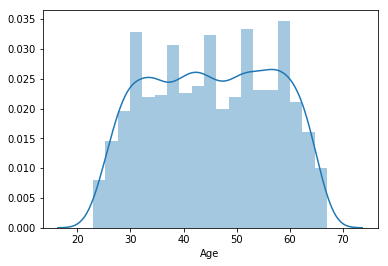

In [8]:
sns.distplot(bank_df['Age'])

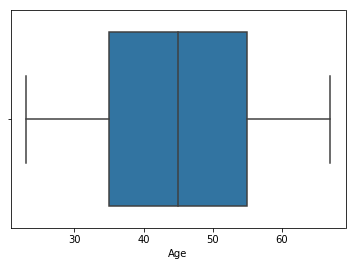

In [9]:
sns.boxplot(bank_df['Age'])

**Comment:** The distribution for age is roughly a normal distribution with the average age being 45.3, the min being 23 and the max being 67

### Experience ###

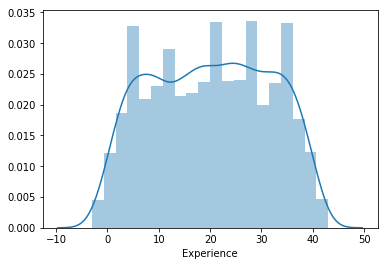

In [11]:
sns.distplot(bank_df['Experience'])

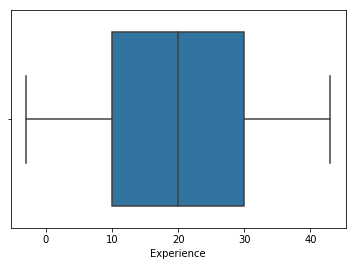

In [12]:
sns.boxplot(bank_df['Experience'])

In [13]:
bank_df[bank_df['Experience'] < 0][['Experience','Income']].head()

,Experience,Income
89,-1,113
226,-1,39
315,-2,51
451,-2,48
524,-1,75


**Comments:** 
* The distribution for Experience is roughly a normal distribution with the average experience being 20.1, the min being -3 and the max being 43. 
* We can see that note that 52 people have negative professional experiences, but still they have a positive income, which doesn't make sense. Maybe it's a typo, and hence we convert all such 'Experience' values to  positive experiences by taking their absolute value.

In [13]:
bank_df['Experience'] = bank_df['Experience'].abs()

### Income ###

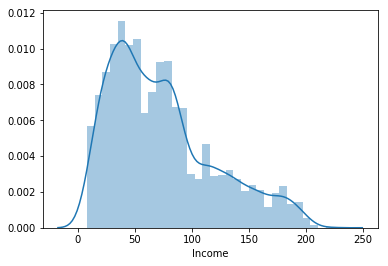

In [14]:
sns.distplot(bank_df['Income'])

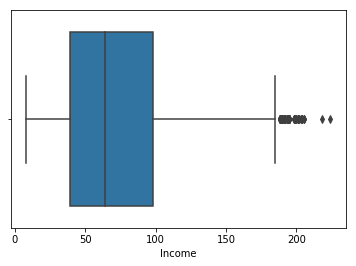

In [15]:
sns.boxplot(bank_df['Income'])

**Comment:** The Income is a right-skewed distribution, and the box-plot detects quite a few outliers in the higher range of incomes

In [30]:
threshold = 3.5
bank_df[np.abs(bank_df_zscores['Income']) > threshold]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


**Comment:** Although the box-plot shows several outliers, if we consider those incomes with abs(z-score) > 3.5 as an outlier, we don't get any outlier.

### ZIP Code ###

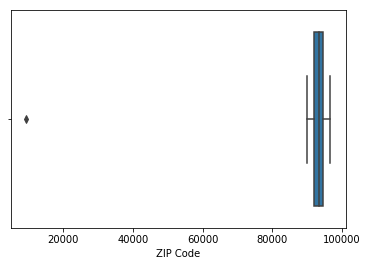

In [20]:
sns.boxplot(bank_df['ZIP Code'])

In [21]:
bank_df[bank_df_zscores['ZIP Code'].abs() > threshold]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


**Comment:** 
* We can clearly see that there is one 'ZIP Code' (9307) which is incorrectly entered as 9307. This is a 4-digit ZIP Code, whereas all others are 5-digit ZIP Codes. 
* **Correction:** We correct this ZIP code by replacing it with the median value of ZIP codes

In [22]:
bank_df.at[bank_df_zscores['ZIP Code'].abs() > threshold,'ZIP Code'] = int(bank_df['ZIP Code'].median())

In [23]:
bank_df.iloc[384:385,:]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,93437,4,0.6,3,0,0,0,0,1,1


In [80]:
pd.value_counts(bank_df['ZIP Code'])

94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
94025     52
91711     52
92093     51
90245     50
90024     50
91330     46
90089     46
94304     45
92121     45
94143     37
95051     34
94608     34
92028     32
92521     32
92182     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
95819     26
        ... 
90272      2
95482      2
91129      2
95307      2
95842      2
91784      2
96094      2
92116      2
94507      2
94575      2
90745      2
93033      2
92161      2
92705      2
94019      2
95816      2
91326      2
94116      2
91941      2
94604      2
94970      1
90068      1
96145      1
94404      1
91024      1
90813      1
92694      1
94598      1
94965      1
94087      1
Name: ZIP Code, Length: 466, dtype: int64

**Comment:** There are three major ZIP codes with lot of account holders from them: 94720, 94305, 95616

### Family ###

In [24]:
pd.value_counts(bank_df['Family'])

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

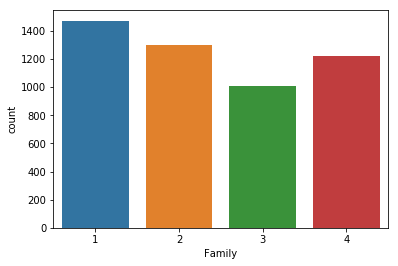

In [25]:
sns.countplot(bank_df['Family'])

**Comment:** Family is categorical variable, with the 'family size' being 1,2,3 or 4, with the value counts for each type given in the plot above.

### CCAvg ###

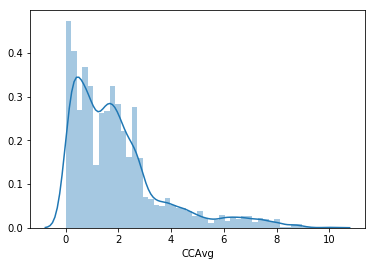

In [26]:
sns.distplot(bank_df['CCAvg'])

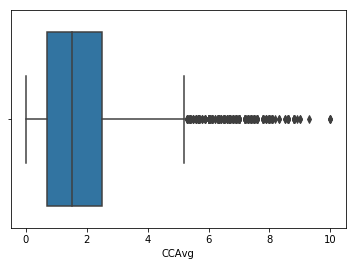

In [27]:
sns.boxplot(bank_df['CCAvg'])

In [32]:
bank_df[np.abs(bank_df_zscores['CCAvg']) > threshold]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
18,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
462,29,4,183,91423,3,8.3,3,0,1,0,0,1,0
614,37,12,180,90034,1,8.6,1,0,0,0,0,1,1
740,52,27,195,90266,1,8.1,1,0,0,0,0,0,0
787,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
807,52,27,162,92096,1,8.1,1,0,0,0,0,1,0
881,44,19,154,92116,2,8.8,1,0,0,0,0,1,0
915,53,28,184,94550,1,8.1,1,303,0,0,0,1,0
917,45,20,200,90405,2,8.8,1,0,0,0,0,1,1


**Comment:** Both the box plot and the z-score method shows several outliers for CCAvg. But on inspecting the values of these outliers, we find that they are not extremely far from the rest of the data. Hence we don't tamper with these outliers.

### Education ###

In [33]:
pd.value_counts(bank_df['Education'])

1    2096
3    1501
2    1403
Name: Education, dtype: int64

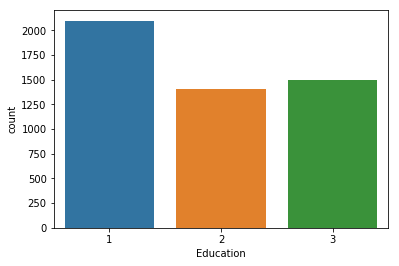

In [34]:
sns.countplot(bank_df['Education'])

**Comment:** Education is categorical variable, with the 'education level' being 1, 2 or 3, with the value counts for each type given in the plot above.

### Mortgage ###

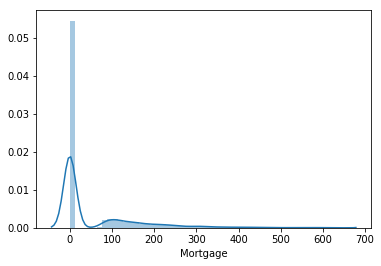

In [38]:
sns.distplot(bank_df['Mortgage'])

Displot for mortgage values > 0

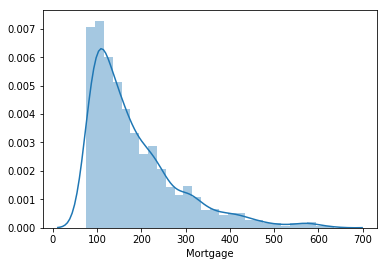

In [39]:
sns.distplot(bank_df[bank_df['Mortgage'] > 0]['Mortgage'])

In [59]:
np.sum(bank_df['Mortgage']==0)/len(bank_df.index)

0.6924

**Comment:** About 69% of the mortgage values are 0. For the rest, the distplot is shown above.

In [68]:
bank_df[np.abs(bank_df_zscores['Mortgage']) > threshold]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
59,31,5,188,91320,2,4.5,1,455,0,0,0,0,0
303,49,25,195,95605,4,3.0,1,617,1,0,0,0,0
354,44,20,173,90277,2,1.4,1,419,0,0,0,1,0
365,57,32,174,90089,1,6.8,2,466,1,0,0,1,0
459,35,10,200,91107,2,3.0,1,458,0,0,0,0,0
473,64,39,182,93955,1,1.2,2,547,1,0,0,1,0
479,60,36,132,92154,2,6.0,1,470,0,0,0,1,1
570,49,25,161,94928,3,6.5,2,485,1,1,1,0,0
684,43,17,164,90266,1,2.4,1,449,0,0,0,1,0
782,54,30,194,92056,3,6.0,3,587,1,1,1,1,1


**Comment:** The z-score method shows several outliers for Mortgage. But on inspecting the values of these outliers, we find that they are not extremely far from the rest of the data. Hence we don't tamper with these outliers.

### Personal Loan ###

In [75]:
pd.value_counts(bank_df['Personal Loan'], normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

**Comment:** 'Personal Loan' is a categorical variable (and our target variable), with the 'Personal Loan' being taken by 9.6% of the account holders

### Securities Account ###

In [74]:
pd.value_counts(bank_df['Securities Account'], normalize=True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

**Comment:** Around 10.4% people have a 'Securities Account' with the bank

### CD Account ###

In [76]:
pd.value_counts(bank_df['CD Account'], normalize=True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

**Comment:** Around 6% people have a 'CD Account' with the bank

### Online ###

In [77]:
pd.value_counts(bank_df['Online'], normalize=True)

1    0.5968
0    0.4032
Name: Online, dtype: float64

**Comment:** Around 60% people use the 'Internet Banking' facility of the bank

### Credit Card ###

In [78]:
pd.value_counts(bank_df['CreditCard'], normalize=True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

**Comment:** Around 29% people use the 'Credit Card' issued by the bank

## Bivariate Analysis ##

### Pairplot ###

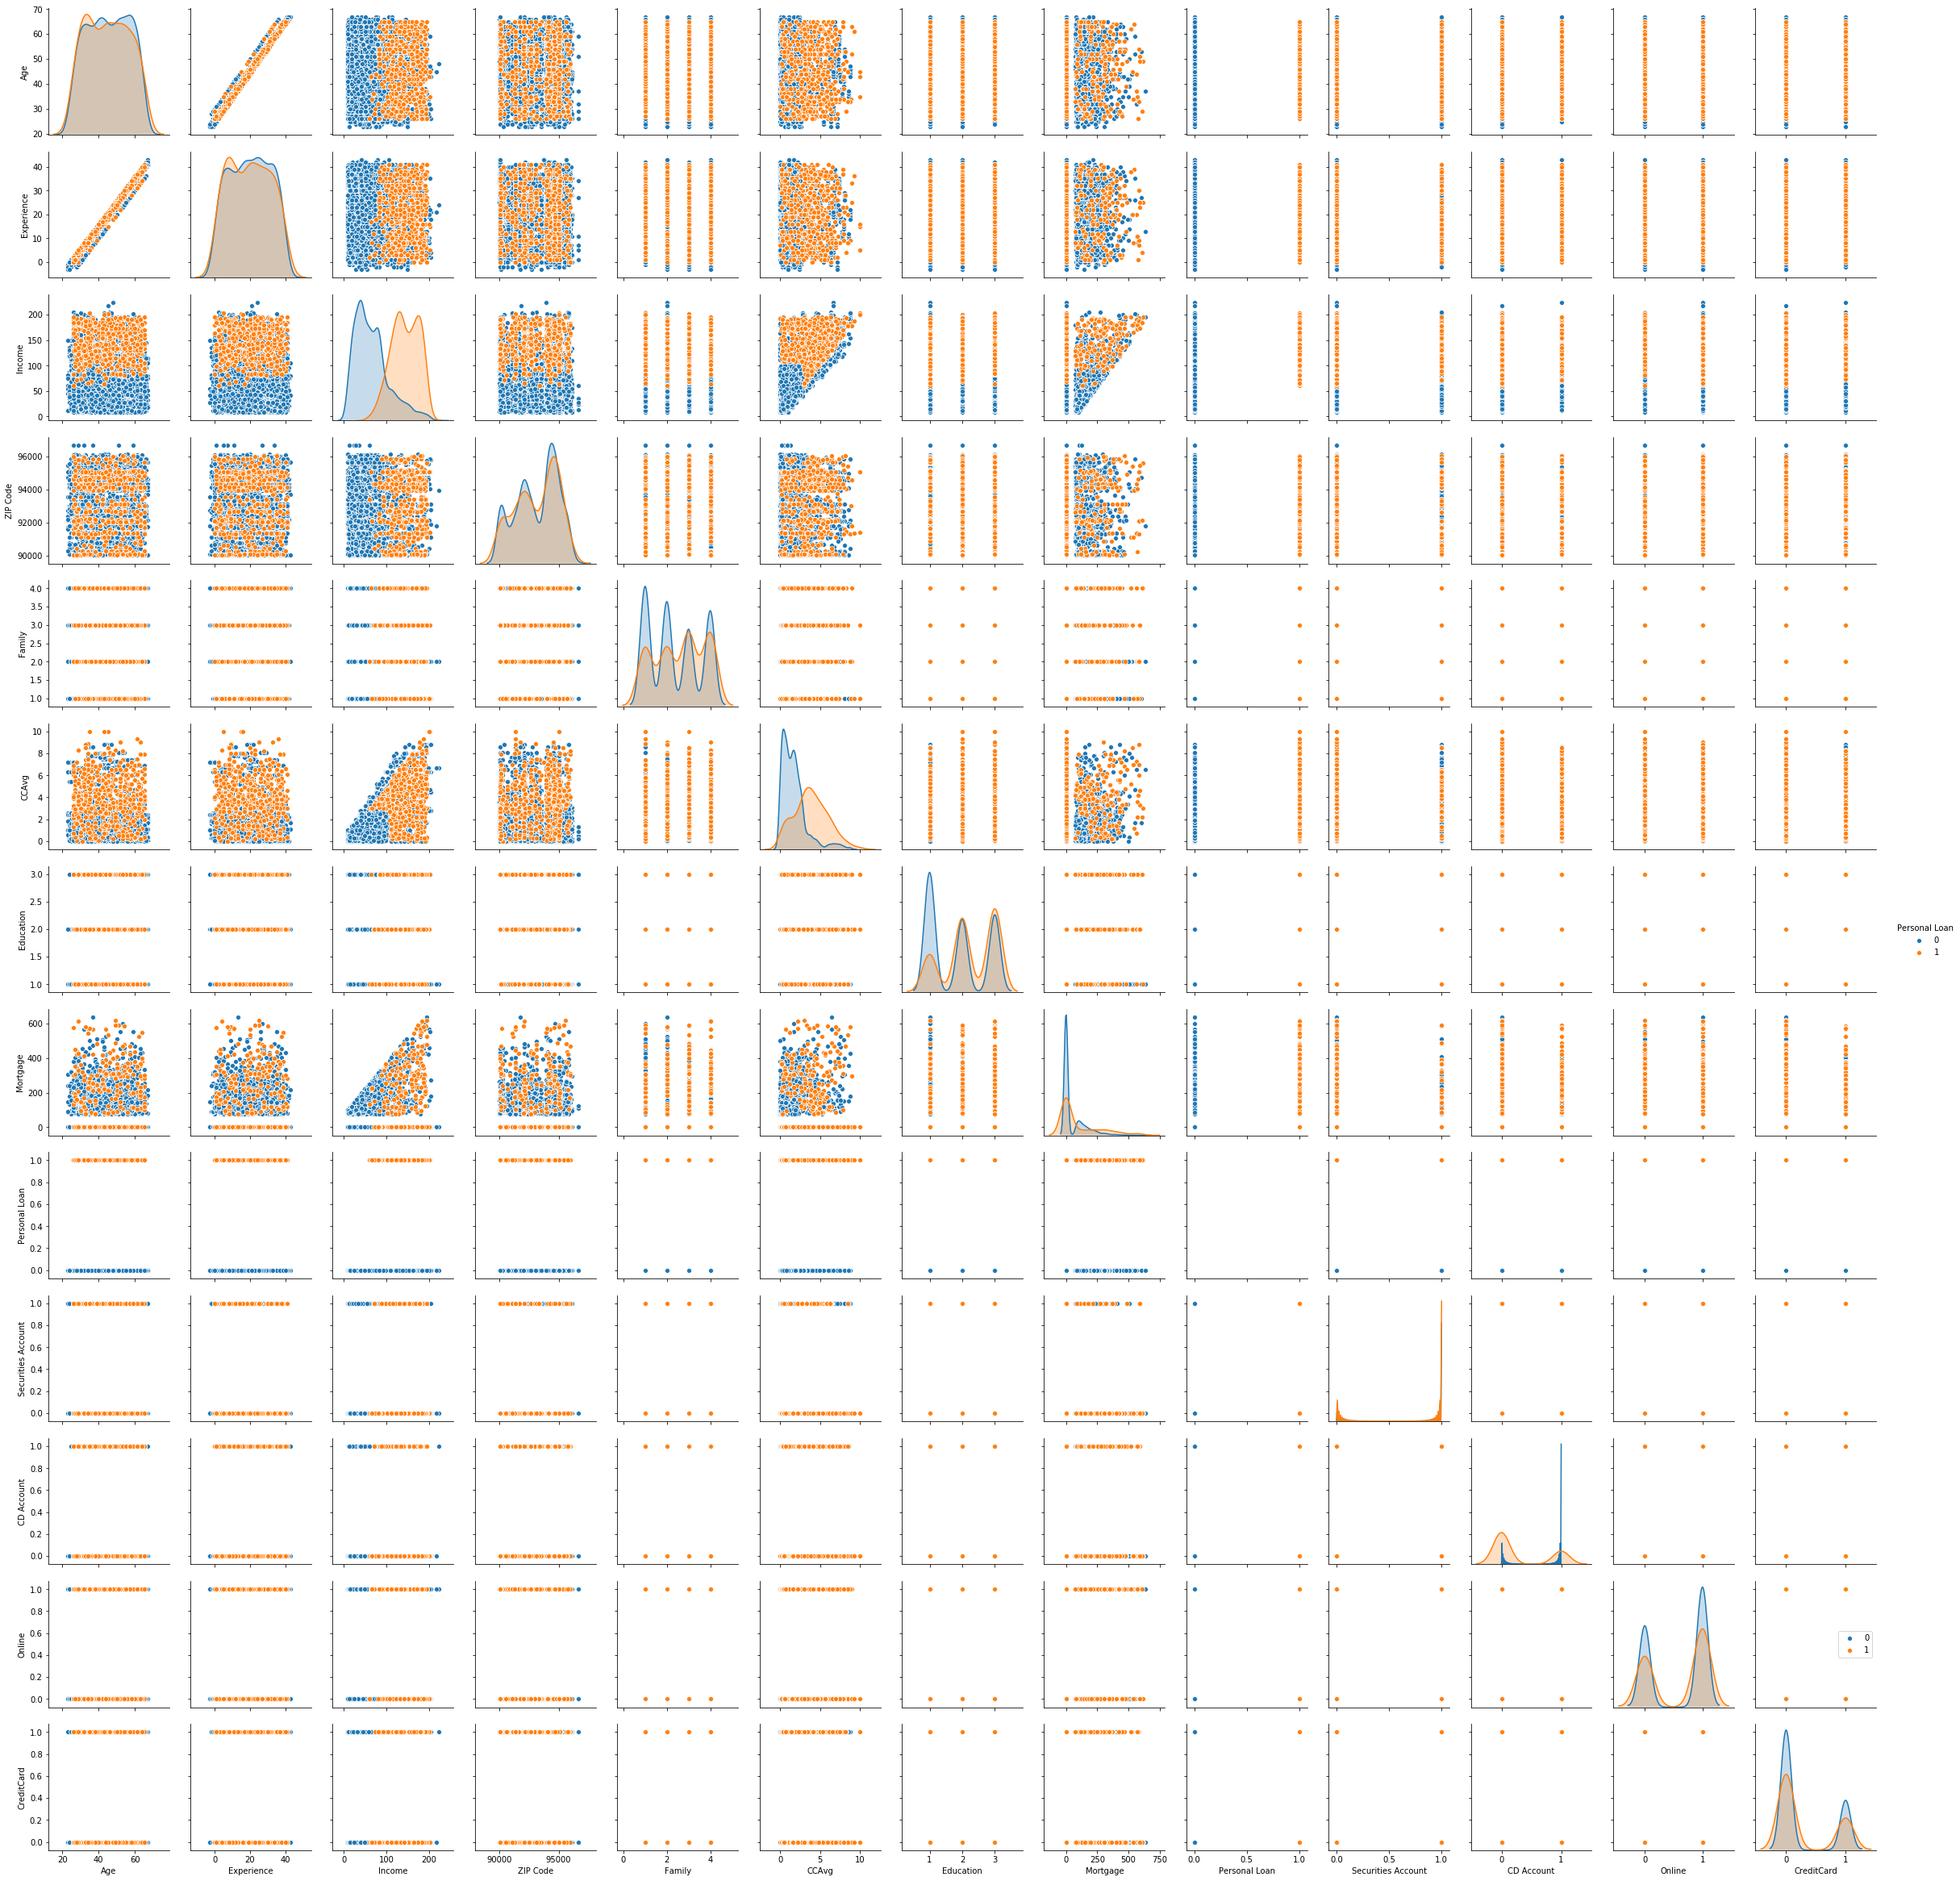

In [56]:
sns.pairplot(bank_df, diag_kind ='kde', hue='Personal Loan')
plt.legend()
plt.show()

#### Observations from Pairplot ####

* Age and Experience are highly correlated
* People with higher income tend to take 'Personal Loans'. 
* People with smaller families have a lesser tendedncy to take 'Peronal Loans'.
* Higher the income, higher the 'Average Credit Card spending' on an average
* Higher the education, more the tendency to take 'Personal Loans'
* Higher the income, higher the 'Mortgage' on an average.
* Higher the mortgages, higher the tendency to take 'Personal Loans'
* People with 'CD Account', tend to take 'Personal Loans' less than those who have it

### Correlation Heatmap ###

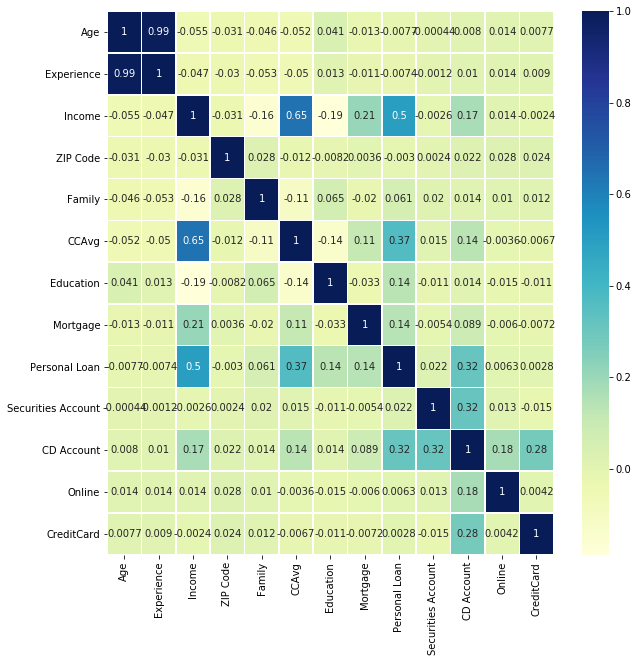

In [81]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(bank_df.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax)

#### Observations from correlation heatmap ####

* 'Age' and 'Experience' are very strongly correlated, implying these could be dependent variables
* 'Personal Loan' has moderately strong correlation with 'Income', 'CCAvg' and 'CD Account', making these good features for predicitng 'Personal Loans'
* 'Income' and 'CCAvg' also have strong correlation.
* 'CD Account' has a moderately strong correlation with 'Securities Account' and 'Credit Card'

## Q3. Get the target column distribution. Your comments ##

In [40]:
pd.value_counts(bank_df['Personal Loan'], normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

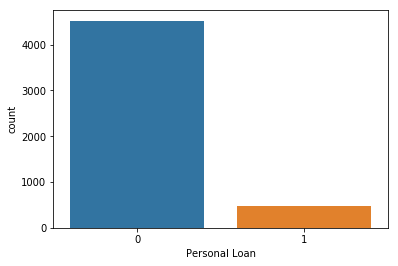

In [41]:
sns.countplot(bank_df['Personal Loan'])

**Comments:** 'Personal Loan' is taken by 9.6% of the account holders

## Q4. Split the data into training and test set in the ratio of 70:30 respectively ##

In [198]:
X = bank_df.drop(columns=['Personal Loan','ID'])
y = bank_df['Personal Loan']

**Dropping variables from feature set having correlation in range -0.01 to 0.01 with target variable.**

In [199]:
X_imp = X
for col in X.columns:
    correlation = y.corr(X[col])
    if (-0.01 <= correlation <= 0.01):
        X_imp.drop(columns=col,inplace=True)
        
X_imp.head()

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
0,49,4,1.6,1,0,1,0
1,34,3,1.5,1,0,1,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


In [200]:
X_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
dtypes: float64(1), int64(6)
memory usage: 273.5 KB


In [201]:
y.value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_imp,y,test_size=0.3,random_state=1)

## Q5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans ##

## Q6. Print the confusion matrix for all the above models ##

### Feature Scaling ###

In [204]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

### Logistic Regression ###

In [205]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(scaled_X_train,y_train)
predicted_train = log_reg.predict(scaled_X_train)
predicted_test = log_reg.predict(scaled_X_test)

**For Train Set**

In [206]:
print('Training Accuracy:',accuracy_score(y_train,predicted_train))

Training Accuracy: 0.9482857142857143


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

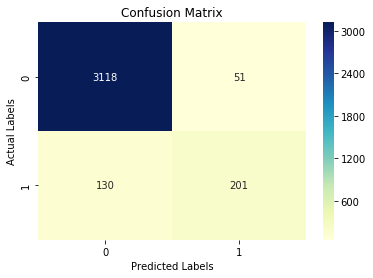

In [207]:
loan_taken = list(y.unique())
cm = confusion_matrix(y_train,predicted_train,labels=loan_taken)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d',ax = ax, cmap="YlGnBu")

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.xaxis.set_ticklabels(loan_taken,ha='center')
ax.yaxis.set_ticklabels(loan_taken,va='center')

**For Test Set**

In [208]:
print('Testing Accuracy:',accuracy_score(y_test,predicted_test))

Testing Accuracy: 0.944


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

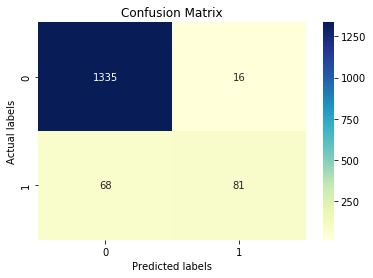

In [209]:
loan_taken = list(y.unique())
cm = confusion_matrix(y_test,predicted_test,labels=loan_taken)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax, cmap="YlGnBu")

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.xaxis.set_ticklabels(loan_taken,ha='center')
ax.yaxis.set_ticklabels(loan_taken,va='center')

In [210]:
print('Test f1 score:',f1_score(y_test,predicted_test))

Test f1 score: 0.6585365853658537


### K-NN ###

**Running KNN for 30 neighbors to check how many 'neighbors' give maximum accuracy.**

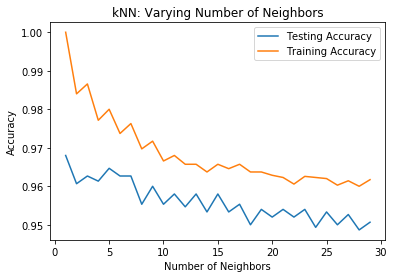

In [211]:
neighbors = np.arange(1, 30)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train,y_train)
    train_accuracy_plot[i] = knn.score(scaled_X_train,y_train)
    test_accuracy_plot[i] = knn.score(scaled_X_test,y_test)
# Generate plot
plt.title('kNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**Getting Optimal value of k**

In [213]:
print('optimal k =', np.argmax(test_accuracy_plot)+1,', accuracy for optimal k =',np.max(test_accuracy_plot))

optimal k = 1 , accuracy for optimal k = 0.968


**Running KNN for neighbors=1**

In [214]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train,y_train)
predicted_train = knn.predict(scaled_X_train)
predicted_test = knn.predict(scaled_X_test)

**For Train Set**

In [215]:
print('Training Accuracy:',accuracy_score(y_train,predicted_train))

Training Accuracy: 1.0


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

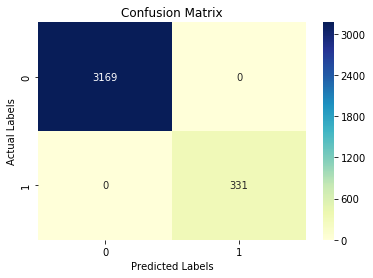

In [216]:
loan_taken = list(y.unique())
cm = confusion_matrix(y_train,predicted_train,labels=loan_taken)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d',ax = ax, cmap="YlGnBu")

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.xaxis.set_ticklabels(loan_taken,ha='center')
ax.yaxis.set_ticklabels(loan_taken,va='center')

**For Test Set**

In [217]:
print('Testing Accuracy:',accuracy_score(y_test,predicted_test))

Testing Accuracy: 0.968


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

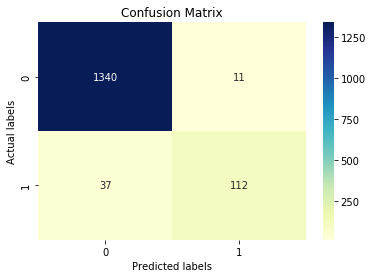

In [218]:
loan_taken = list(y.unique())
cm = confusion_matrix(y_test,predicted_test,labels=loan_taken)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax, cmap="YlGnBu")

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.xaxis.set_ticklabels(loan_taken,ha='center')
ax.yaxis.set_ticklabels(loan_taken,va='center')

In [219]:
print('Test f1 score:',f1_score(y_test,predicted_test))

Test f1 score: 0.8235294117647058


### Naive Bayes ###

In [220]:
gnb = GaussianNB()
gnb.fit(scaled_X_train,y_train)
predicted_train = gnb.predict(scaled_X_train)
predicted_test = gnb.predict(scaled_X_test)

**For Train Set**

In [221]:
print('Training Accuracy:',accuracy_score(y_train,predicted_train))

Training Accuracy: 0.8897142857142857


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

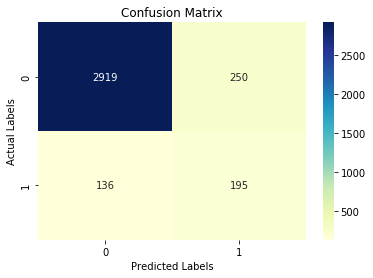

In [222]:
loan_taken = list(y.unique())
cm = confusion_matrix(y_train,predicted_train,labels=loan_taken)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d',ax = ax, cmap="YlGnBu")

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.xaxis.set_ticklabels(loan_taken,ha='center')
ax.yaxis.set_ticklabels(loan_taken,va='center')

**For Test Set**

In [223]:
print('Testing Accuracy:',accuracy_score(y_test,predicted_test))

Testing Accuracy: 0.8753333333333333


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

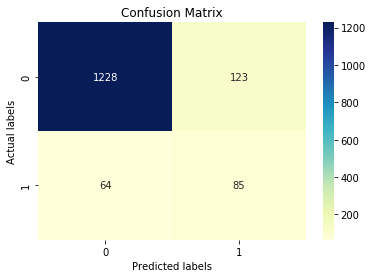

In [224]:
loan_taken = list(y.unique())
cm = confusion_matrix(y_test,predicted_test,labels=loan_taken)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax, cmap="YlGnBu")

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.xaxis.set_ticklabels(loan_taken,ha='center')
ax.yaxis.set_ticklabels(loan_taken,va='center')

In [225]:
print('Test f1 score:',f1_score(y_test,predicted_test))

Test f1 score: 0.47619047619047616


## 7. Give your reasoning on which is the best model in this case and why it performs better? ##

The best performing model of all the three is **KNN** as it gives the **highest 'test accuracy score'** and **highest 'f1 score'** amongst all the three.

**Reason for better performance**

KNN (although slow) performs best because:
* It could be possible the solution is a non-linear one, whereas Logistic Regression works best for linear solutions and KNN works well for non-ilnear solutions as well.
* Naive Bayes assumes that the features are independent, which may not be the case in this feature set ('CCAvg' and 'Income' have a high correlation and may be dependent), leading to a lower accuracy. KNN makes no such assumptions